### Data wrangling with pandas

Read this notebook carefully and try to understand how everything works.  Do variations on your own and explore.

Then try to answer the questions at the bottom.


In this exercise you will use pandas to do some analysis of the "name" data located in the folder

```
../Handouts/some_data/names/
```

If you are working in your Assignments directory, then you can see this directory thusly:



In [1]:

!ls ../Handouts/some_data/names/



yob1880.txt yob1904.txt yob1928.txt yob1952.txt yob1976.txt yob2000.txt
yob1881.txt yob1905.txt yob1929.txt yob1953.txt yob1977.txt yob2001.txt
yob1882.txt yob1906.txt yob1930.txt yob1954.txt yob1978.txt yob2002.txt
yob1883.txt yob1907.txt yob1931.txt yob1955.txt yob1979.txt yob2003.txt
yob1884.txt yob1908.txt yob1932.txt yob1956.txt yob1980.txt yob2004.txt
yob1885.txt yob1909.txt yob1933.txt yob1957.txt yob1981.txt yob2005.txt
yob1886.txt yob1910.txt yob1934.txt yob1958.txt yob1982.txt yob2006.txt
yob1887.txt yob1911.txt yob1935.txt yob1959.txt yob1983.txt yob2007.txt
yob1888.txt yob1912.txt yob1936.txt yob1960.txt yob1984.txt yob2008.txt
yob1889.txt yob1913.txt yob1937.txt yob1961.txt yob1985.txt yob2009.txt
yob1890.txt yob1914.txt yob1938.txt yob1962.txt yob1986.txt yob2010.txt
yob1891.txt yob1915.txt yob1939.txt yob1963.txt yob1987.txt yob2011.txt
yob1892.txt yob1916.txt yob1940.txt yob1964.txt yob1988.txt yob2012.txt
yob1893.txt yob1917.txt yob1941.txt yob1965.txt yob1989.txt yob2

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.errors import MergeError

### Step 1

Open and load one of these files as a pandas DataFrame using the `read_csv` method as we did in class.

Make sure that you set `header=None` so that you do not get the first line mistakenly giving column names.

Then set the columns to have meaningful names.

Use the `set_index` method to make the "name" column the index.

Then use the pandas `head()` method to look at the first few lines of your file. 

The final output should look like this:

![hi](namesTable.png)

In [90]:
## You try here (answer below..)


df = pd.read_csv('../Handouts/some_data/names/yob1918.txt', sep =',',header = None)

df.columns = ['name','sex','frequency']


df.head()











,name,sex,frequency
0,Mary,F,67366
1,Helen,F,36148
2,Dorothy,F,32030
3,Margaret,F,27139
4,Ruth,F,25534


### Top 50

Print out the 10 most popular names in your file.

The output could look like this.  Note that it is **not** just the first 10 rows.

![topTen](topTen.png)


In [14]:
### You try here, answer below...
df_top10 = df.sort_values("frequency",ascending=False).head(10).reset_index(drop=True)


df_top10







,name,sex,frequency
0,Mary,F,67366
1,John,M,56558
2,William,M,45291
3,James,M,42116
4,Robert,M,40619
5,Helen,F,36148
6,Dorothy,F,32030
7,Margaret,F,27139
8,Charles,M,26921
9,George,M,26318


### Bar plot

Now make a bar plot for the 10 most popular names in your file.

The output might look like this:

![bc](barChart.png)

Text(0, 0.5, 'frequency')

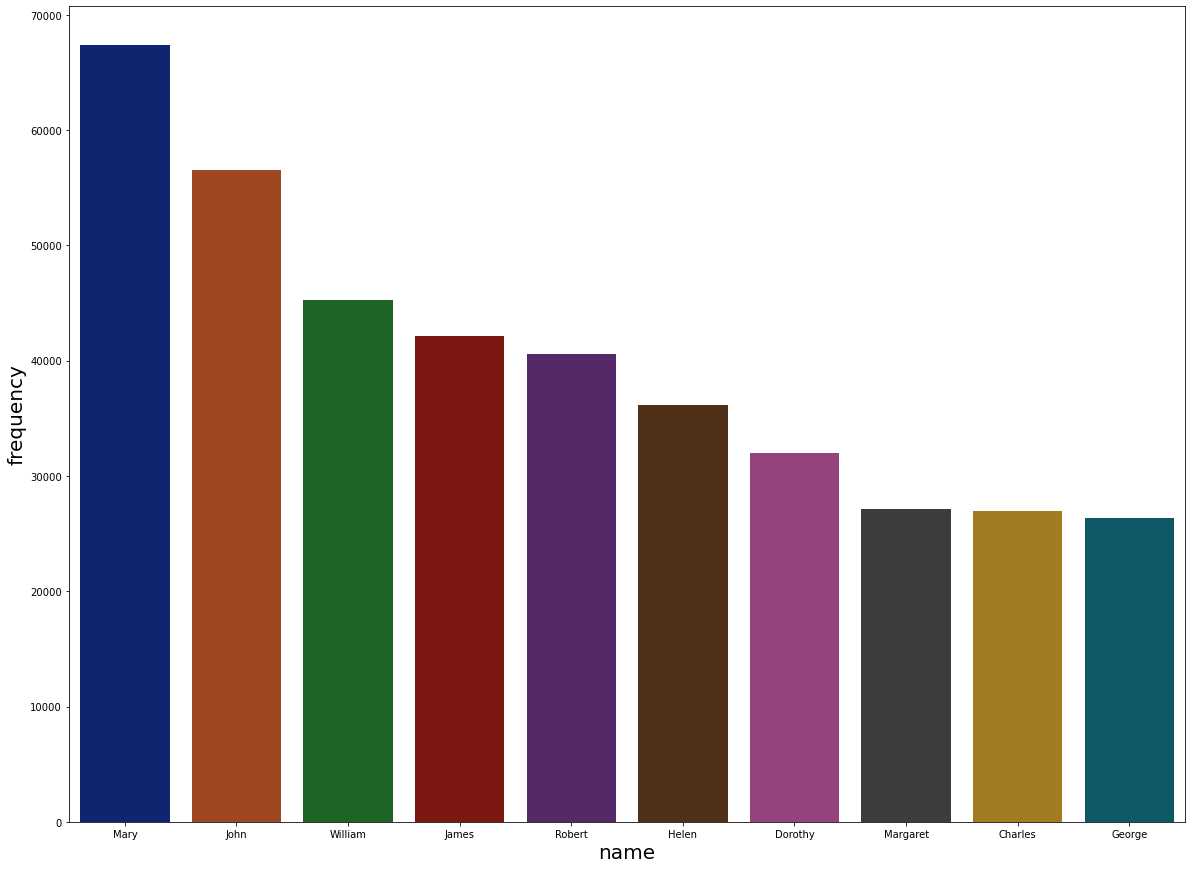

In [15]:
### You try here (answer below...)

plt.figure(figsize=(20,15))
sns.barplot(x='name',y ='frequency',data =df_top10,palette = 'dark')
plt.xlabel('name',size=20)
plt.ylabel('frequency',size=20)














### Boys and girls

Repeat the above exercise of making a bar plot of the most popular names, but this time make one chart just for boys, and another just for girls.

Try to do it via these steps:

1. Create a new dataframe that contains just the girls from the main dataframe.
2. Create a new dataframe that contains just the boys from the main dataframe.
3. Repeat what you did to make the bar plot before.

For instance to get just the boys you could do 

```python
df_boys = df[df["sex"]=="M"]
```


In [16]:
## workspace
df_boys = df[df['sex']=='M'].sort_values("frequency",ascending=False).head(10)
df_girls = df[df['sex']=='F'].sort_values("frequency",ascending=False).head(10)



Text(0.5, 1.0, 'Boys top 10')

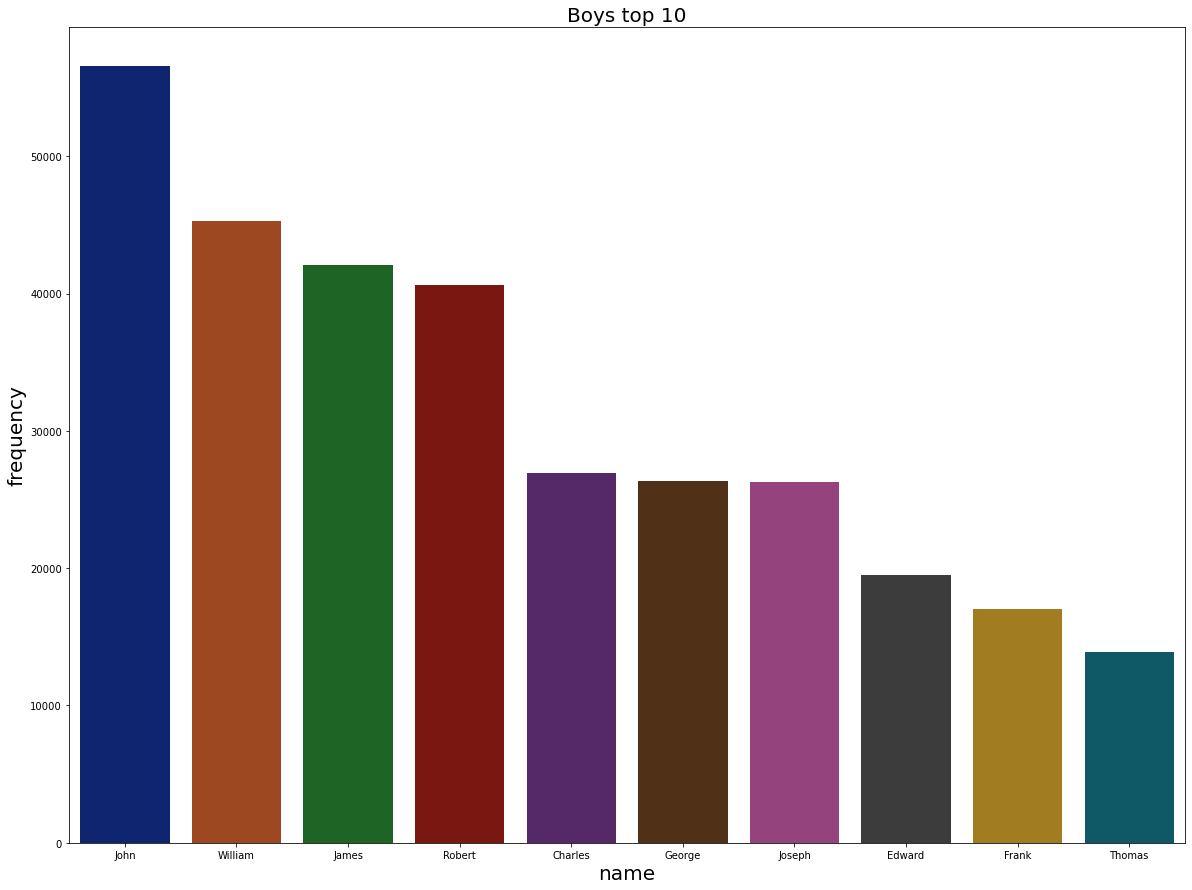

In [17]:
plt.figure(figsize=(20,15))
sns.barplot(x='name',y ='frequency',data =df_boys,palette = 'dark')

plt.xlabel('name',size=20)
plt.ylabel('frequency',size=20)
plt.title('Boys top 10',size=20)

Text(0.5, 1.0, 'girls top 10')

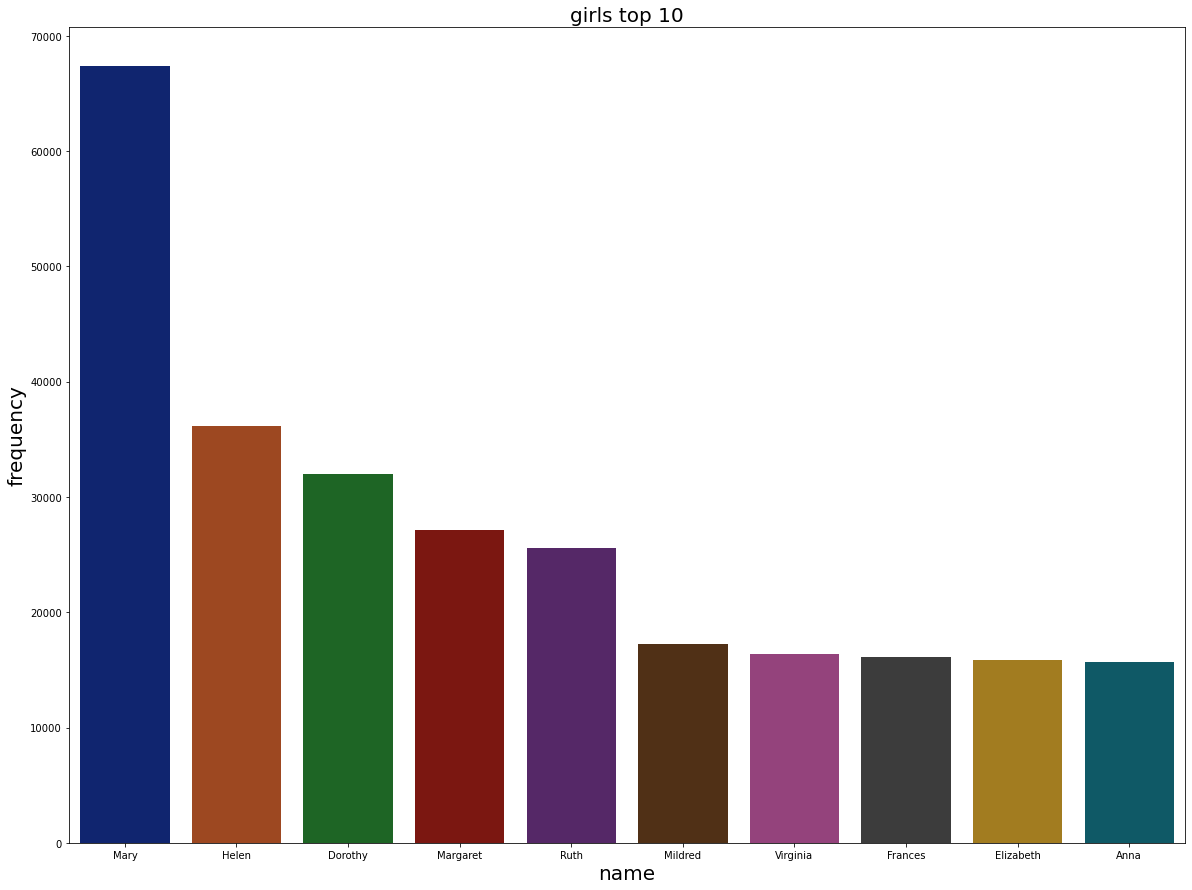

In [18]:
plt.figure(figsize=(20,15))
sns.barplot(x='name',y ='frequency',data =df_girls,palette = 'dark')

plt.xlabel('name',size=20)
plt.ylabel('frequency',size=20)
plt.title('girls top 10',size=20)

### Big dataframe

We will now combine all the `yobxxxx.txt` files into one big dataframe.

This is a little technical so I have done it for you.  If you want to try it yourself without looking at my solution, please do!



In [19]:
filenames = !ls ../Handouts/some_data/names/
filenames[:10]

['yob1880.txt',
 'yob1881.txt',
 'yob1882.txt',
 'yob1883.txt',
 'yob1884.txt',
 'yob1885.txt',
 'yob1886.txt',
 'yob1887.txt',
 'yob1888.txt',
 'yob1889.txt']

In [20]:
## This will take a minute or two to run

dirName = "../Handouts/some_data/names/"
yearDict = {}

for fn in filenames:
    df = pd.read_csv(dirName+fn,header=None)

    df.columns = ["name","sex","frequency"]
    year = fn[3:3+4]  ## slice the "year" part out of the filename
    yearDict[year] = {(df.loc[i]["name"],df.loc[i]["sex"]):df.loc[i]["frequency"] for i in df.index}
    if int(year)%20 == 0:
        print(year)


1880
1900
1920
1940
1960
1980
2000
2020


In [21]:
df = pd.DataFrame(yearDict)

In [22]:
df.sample(5)

,,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Lusetta,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Demetrias,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mishaal,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8.0,5.0,NaN,5.0,NaN,NaN,NaN,6.0,NaN
Calixto,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,13.0,11.0,12.0,14.0,12.0,15.0,NaN,10.0,10.0
Kioni,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN


### Fix NaN

Many of the entries in the dataframe are `NaN` (not a number).  For instance the value of the name Kalven for boys is NaN in 1888 because no babies were given that name.

Convert the NaN values to 0.  To learn how google something like "pandas nan to zero" etc.  You will find plenty of tutorials.



In [10]:
df = df.fillna(0)
df.sample(5)

,,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Shaquan,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Davied,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Derel,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Vaylin,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
Hiromy,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Take the transpose

In the dataframe we have, names (paired with sex) is the row index and years are the column index.

Take the transpose of the dataframe so that the reverse is true.

In [11]:
df = df.T
df.sample(5)

,Mary,Anna,Emma,Elizabeth,Minnie,Margaret,Ida,Alice,Bertha,Sarah,...,Yuli,Yuvanreddy,Zaed,Zaiyr,Zakoda,Zayre,Zehaan,Zeland,Zemariam,Zhayd
,F,F,F,F,F,F,F,F,F,F,...,M,M,M,M,M,M,M,M,M,M
1975,10967.0,3577.0,477.0,12472.0,95.0,2952.0,240.0,1055.0,263.0,11171.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,6649.0,8341.0,7748.0,15428.0,30.0,2967.0,97.0,579.0,124.0,20712.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1919,65837.0,14498.0,5087.0,15287.0,3272.0,26238.0,4163.0,11141.0,4754.0,5022.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1940,56212.0,4718.0,2607.0,9953.0,1228.0,15060.0,1689.0,7601.0,1730.0,3870.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1987,8395.0,6168.0,1588.0,18608.0,45.0,3146.0,150.0,771.0,155.0,27894.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
df.to_csv('combined',index=False)

### Export to pickle

In python "pickling" is saving an object to disk.  This can be useful when something takes a long time to compute. 

For example making the dataframe `df` took a couple of minutes.  Let's save it to disk so that we don't have to recompute it if we want to work with it later.

**Note:** python pickles are "dangerous" in the sense that if someone gives you a pickle file it could contain malicious code.  Don't load strange pickles or you will get pwned.  

In the cell below, save `df` to a pickle and then reload it.  

Sample the result to make sure everything looks right.


In [27]:
import pickle

with open("df.pkl","wb") as handle:
    pickle.dump(df,handle)
    
with open("df.pkl","rb") as handle:
    dff = pickle.load(handle)
    
dff.sample(5)

,,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Ijeoma,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,6.0,11.0,5.0,5.0,6.0,NaN,8.0,NaN,NaN
Alexamarie,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kemel,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zuha,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,7.0,6.0,NaN,8.0,NaN,7.0,9.0,9.0
Earvie,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Plot popularity curve

We now want to make some curves to show how popularity has changed over the years.



In [24]:
import matplotlib.pyplot as plt
df[("Mary","F")].plot(label="Mary")
df[("Frank","M")].plot(label="Frank")
plt.legend()
plt.show()

KeyError: ('Mary', 'F')

### Correlation

Explore correlations in name popularity over time.



In [19]:
df[[("Mary","F"),("Kate","F"),("Ashley","F")]].corr()

,,Mary,Kate,Ashley
,,F,F,F
Mary,F,1.000000,-0.619511,-0.402789
Kate,F,-0.619511,1.000000,0.540222
Ashley,F,-0.402789,0.540222,1.000000


<AxesSubplot:>

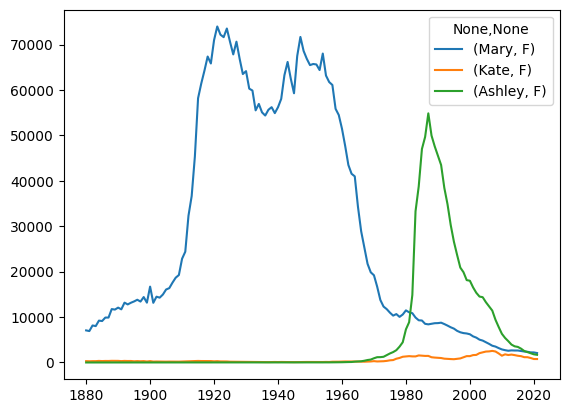

In [20]:
df[[("Mary","F"),("Kate","F"),("Ashley","F")]].plot()

In [22]:
df[[("Matthew","M"),("Mark","M"),("Luke","M"),("John","M")]].corr()

,,Matthew,Mark,Luke,John
,,M,M,M,M
Matthew,M,1.000000,0.177499,0.441504,-0.147060
Mark,M,0.177499,1.000000,-0.163821,0.625540
Luke,M,0.441504,-0.163821,1.000000,-0.429029
John,M,-0.147060,0.625540,-0.429029,1.000000


<AxesSubplot:>

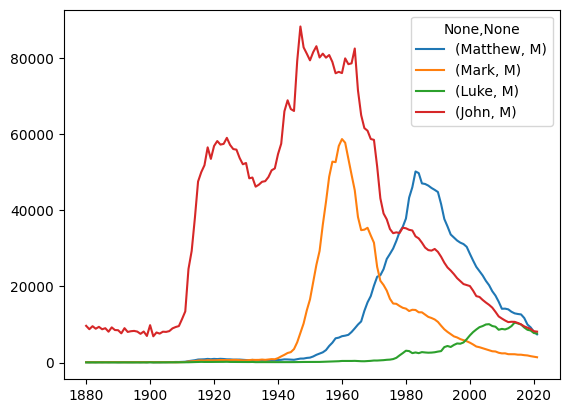

In [23]:
df[[("Matthew","M"),("Mark","M"),("Luke","M"),("John","M")]].plot()

In [7]:
import pandas as pd


<module 'pandas' from '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/__init__.py'>

In [10]:

fn = !ls ../../../Handouts/some_data/names/
dirName = "../../../Handouts/some_data/names/"
tf = pd.DataFrame()

for f in fn:
    df = pd.read_csv(dirName+f, sep =',',header = None)
    df.columns = ['name','sex','frequency']
    df['year'] = f[3:3+4]
    try:
        tf = pd.merge(left = df,right =tf,how='outer')
    except pd.errors.MergeError:
        print("eerrrr")
        tf = df
        
        
    

eerrrr


In [11]:
tf = tf.fillna(0)
tf.sample(5)

,name,sex,frequency,year
757882,Gwendelyn,F,9,1998
281298,Nicco,M,45,2013
961454,Daneisha,F,34,1990
472896,Cayman,F,14,2007
1607187,Carl,M,7829,1948


In [31]:
mary = tf[(tf['name']== 'Mary') & (tf['sex']== 'F')]
mary

,name,sex,frequency,year
132,Mary,F,2080,2021
31659,Mary,F,2210,2020
63115,Mary,F,2226,2019
95188,Mary,F,2355,2018
127384,Mary,F,2416,2017
...,...,...,...,...
2042339,Mary,F,9217,1884
2044636,Mary,F,8012,1883
2046720,Mary,F,8148,1882
2048847,Mary,F,6919,1881


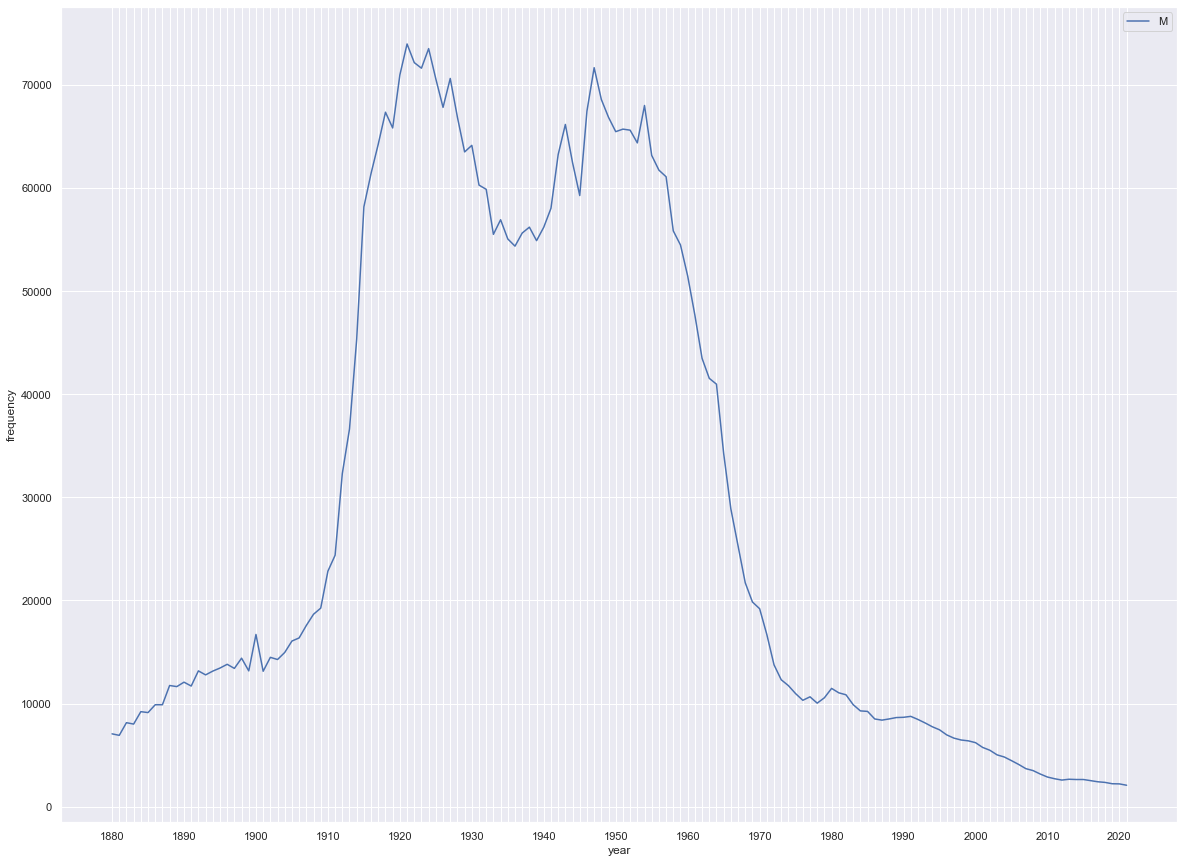

In [42]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,15))
plot = sns.lineplot(data =mary,x ='year',y = 'frequency')
for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.legend(labels='Mary')

In [89]:
save='baby'
tf.to_csv(save,index=False)

### Marginalia

Try to answer these questions.

1. What is the most popular name of all time (most babies with this name)?
2. What was the most popular girl's name in the 1990s?
3. How many people babies were born in 1919, according to the data?
4. How many boys were born in the 'oughts' according to the data?
5. Use the data to plot US births during the 20th century.  The $x$ axis should be "year" and the $y$ axis should be "number of births that year". See if you can identify the "boomers".



*Hint* This will require summing along different axes [https://www.geeksforgeeks.org/python-pandas-dataframe-sum/](https://www.geeksforgeeks.org/python-pandas-dataframe-sum/)

In [53]:
gb= tf.groupby(['name','sex'])
new =gb['frequency'].sum().reset_index(name='sum').sort_values('sum',ascending =False).reset_index(drop=True)
new.head(1)

,name,sex,sum
0,James,M,5202714


# 1.James

In [58]:

tf['year'] =pd.to_numeric(tf['year'])

In [59]:
tf.dtypes

name         object
sex          object
frequency     int64
year          int64
dtype: object

In [74]:
c1 = tf['year'] >= 1990 
c2 = tf['year'] <= 1999
c3 = tf['sex'] =='F'
girls90s = tf[c1&c2&c3].reset_index(drop=True)
gb= girls90s.groupby('name')
new =gb['frequency'].sum().reset_index(name='sum').sort_values('sum',ascending =False).reset_index(drop=True)
new.head(1)



,name,sum
0,Jessica,303115


# 2.Jessica

In [78]:
c1 = tf['year'] == 1919
baby1919 = tf[c1].reset_index(drop=True)
baby1919.frequency.sum()

2110266

# 3. 2110266

In [87]:
c1 = tf['year'] >= 1900
c2 = tf['year'] <= 1999
baby20cent = tf[c1&c2]
gb= baby20cent.groupby('year')
new =gb['frequency'].sum().reset_index(name='sum').sort_values('sum',ascending =False).reset_index(drop=True)
new[new['year']== 1999]

,year,sum
20,1999,3693472


Text(0.5, 1.0, '20th century')

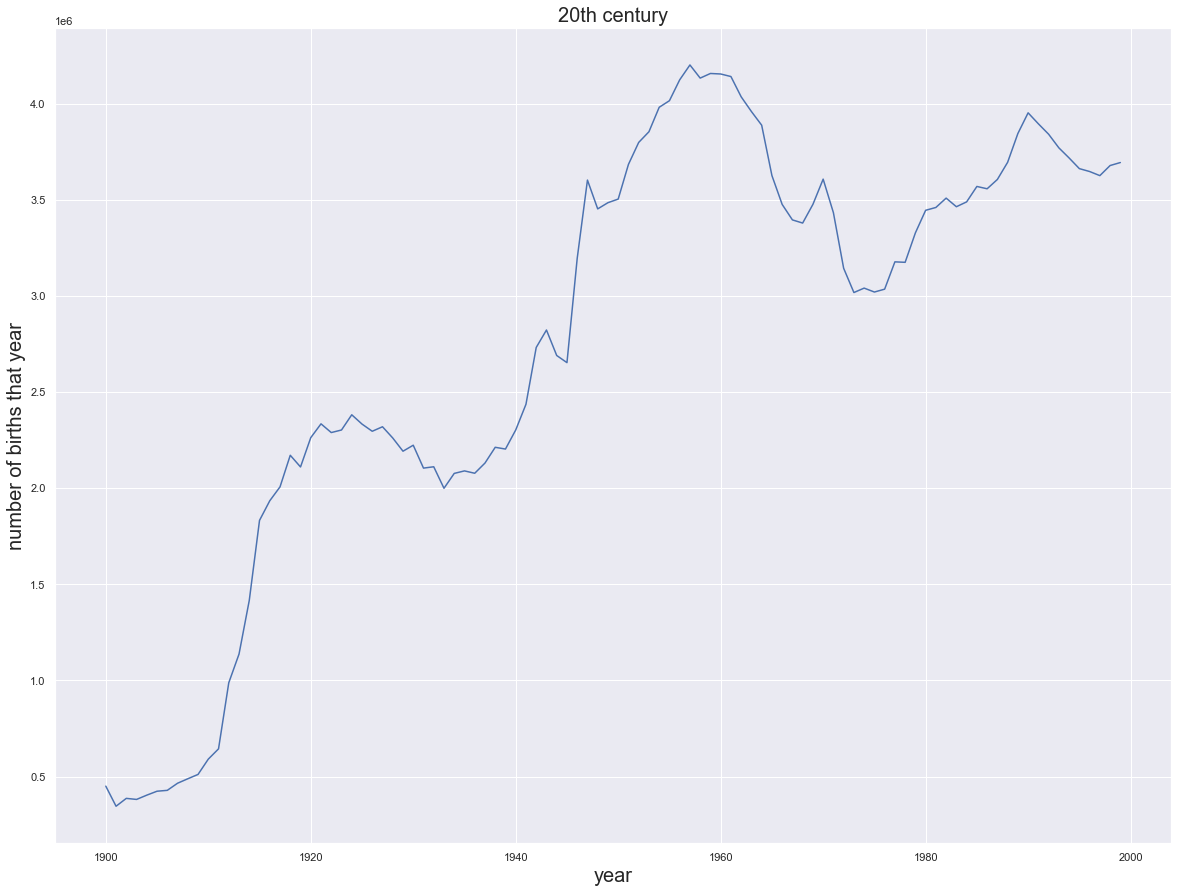

In [88]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,15))
plot = sns.lineplot(data =new,x ='year',y = 'sum')
plt.xlabel('year',size=20)
plt.ylabel('number of births that year',size=20)
plt.title('20th century',size=20)

### Notes

Hi Stephen, this is amazing work! Did you get some training on pandas and python before? Either way this work is really great. You get an A.